In [1]:
import pandas as pd
import numpy as np
# set option to display all columns in data frame
pd.options.display.max_columns = None

In [2]:
data=pd.read_csv('CLV_data_all.csv')

In [3]:
data.head()

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Involvement
0,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,1. Promoter,1,80,720000,12000,80,80,0,0,80,0,0,2
1,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,2. Passive,1,100,900000,15000,100,100,0,0,100,0,0,2
2,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,3. Detractor,1,80,720000,12000,80,80,0,0,80,0,0,2
3,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,1. Promoter,1,80,720000,12000,80,80,0,0,80,0,80,4
4,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,2. Passive,1,80,720000,12000,80,80,0,0,80,0,80,4


In [4]:
data['NPS'] = data['NPS'].str.replace(r'3. Detractor','1')
data['NPS'] = data['NPS'].str.replace(r'2. Passive','2')
data['NPS'] = data['NPS'].str.replace(r'1. Promoter','3')

<ipython-input-4-a44f80c204bc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['NPS'] = data['NPS'].str.replace(r'3. Detractor','1')
<ipython-input-4-a44f80c204bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['NPS'] = data['NPS'].str.replace(r'2. Passive','2')
<ipython-input-4-a44f80c204bc>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['NPS'] = data['NPS'].str.replace(r'1. Promoter','3')


In [5]:
data['NPS'] =data['NPS'] .astype(int)

Our model is an adaptive RFM model , using tenure as a measure of recenecy, involvment as a measure of frequency and revenue as a measure of monetary value. Refer to it as TIM (Tenure, Involvement, Monetary)
Involvement includes: International, CA, Card, Investment, Insurance, Mortgage, Digital

In [6]:
# rank customers based on these measures
data['T_rank'] = data['Tenure'].rank(ascending=False)
data['I_rank'] = data['Involvement'].rank(ascending=True)
data['R_rank'] = data['Revenue'].rank(ascending=True)
data['S_rank'] = data['NPS'].rank(ascending=True)

In [7]:
# normalizing the rank
data['T_rank_norm'] = (data['T_rank']/data['T_rank'].max())*100
data['I_rank_norm'] = (data['I_rank']/data['I_rank'].max())*100
data['R_rank_norm'] = (data['R_rank']/data['R_rank'].max())*100
data['S_rank_norm'] = (data['S_rank']/data['S_rank'].max())*100
 
data.drop(columns=['T_rank', 'I_rank', 'R_rank', 'S_rank'], inplace=True)
 
data.head()

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Involvement,T_rank_norm,I_rank_norm,R_rank_norm,S_rank_norm
0,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,3,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,11.765507,38.077278,100.000000
1,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,2,1,100,900000,15000,100,100,0,0,100,0,0,2,71.428867,11.765507,45.009135,60.000434
2,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,1,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,11.765507,38.077278,20.000868
3,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,3,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,100.000000
4,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,2,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,60.000434


## Calculate TIR score


In [8]:

data['TIR_Score'] = 0.055*data['T_rank_norm']+0.263 * \
    data['I_rank_norm']+.5638*data['R_rank_norm']+ 0.117*data['S_rank_norm']
data['TIR_Score'] *= 0.1


In [9]:
data.head(10)

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Involvement,T_rank_norm,I_rank_norm,R_rank_norm,S_rank_norm,TIR_Score
0,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,3,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,11.765507,38.077278,100.000000,4.019089
1,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,2,1,100,900000,15000,100,100,0,0,100,0,0,2,71.428867,11.765507,45.009135,60.000434,3.941912
2,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,1,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,11.765507,38.077278,20.000868,3.083099
3,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,3,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,100.000000,5.029824
4,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,2,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,60.000434,4.561830
5,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,1,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,20.000868,4.093835
6,3. Bronze,0,2,2. 25 - 35,0,0,0,1,1,0,3,1,80,720000,12000,80,80,0,0,80,80,0,3,71.428867,28.235946,38.077278,100.000000,4.452261
7,3. Bronze,0,2,2. 25 - 35,0,0,0,1,1,0,2,1,80,720000,12000,80,80,0,0,80,80,0,3,71.428867,28.235946,38.077278,60.000434,3.984266
8,3. Bronze,0,2,2. 25 - 35,0,0,0,1,1,0,1,1,80,720000,12000,80,80,0,0,80,80,0,3,71.428867,28.235946,38.077278,20.000868,3.516271
9,3. Bronze,1,2,2. 25 - 35,0,0,0,1,1,1,3,1,80,720000,12000,80,80,0,0,80,80,80,5,71.428867,72.157115,38.077278,100.000000,5.607388


Rating Customers based on TIR Score

In [10]:
data["Customer_segment"] = np.where(data['TIR_Score'] >
                                      8, "Top Customers",
                                      (np.where(
                                        data['TIR_Score'] > 6,
                                        "High value Customer",
                                        (np.where(
    data['TIR_Score'] > 4,
                             "Medium Value Customer",
                             np.where(data['TIR_Score'] > 2,
                            'Low Value Customers', 'Lost Customers'))))))

In [11]:
data.head(10)

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Involvement,T_rank_norm,I_rank_norm,R_rank_norm,S_rank_norm,TIR_Score,Customer_segment
0,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,3,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,11.765507,38.077278,100.000000,4.019089,Medium Value Customer
1,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,2,1,100,900000,15000,100,100,0,0,100,0,0,2,71.428867,11.765507,45.009135,60.000434,3.941912,Low Value Customers
2,3. Bronze,0,2,2. 25 - 35,0,0,0,1,0,0,1,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,11.765507,38.077278,20.000868,3.083099,Low Value Customers
3,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,3,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,100.000000,5.029824,Medium Value Customer
4,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,2,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,60.000434,4.561830,Medium Value Customer
5,3. Bronze,1,2,2. 25 - 35,0,0,0,1,0,1,1,1,80,720000,12000,80,80,0,0,80,0,80,4,71.428867,50.196531,38.077278,20.000868,4.093835,Medium Value Customer
6,3. Bronze,0,2,2. 25 - 35,0,0,0,1,1,0,3,1,80,720000,12000,80,80,0,0,80,80,0,3,71.428867,28.235946,38.077278,100.000000,4.452261,Medium Value Customer
7,3. Bronze,0,2,2. 25 - 35,0,0,0,1,1,0,2,1,80,720000,12000,80,80,0,0,80,80,0,3,71.428867,28.235946,38.077278,60.000434,3.984266,Low Value Customers
8,3. Bronze,0,2,2. 25 - 35,0,0,0,1,1,0,1,1,80,720000,12000,80,80,0,0,80,80,0,3,71.428867,28.235946,38.077278,20.000868,3.516271,Low Value Customers
9,3. Bronze,1,2,2. 25 - 35,0,0,0,1,1,1,3,1,80,720000,12000,80,80,0,0,80,80,80,5,71.428867,72.157115,38.077278,100.000000,5.607388,Medium Value Customer


In [12]:
import matplotlib.pyplot as plt 

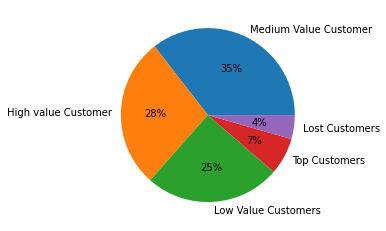

<Figure size 432x288 with 0 Axes>

In [13]:
plt.pie(data.Customer_segment.value_counts(),
        labels=data.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()
plt.savefig('Segmentation.png')

In [14]:
data.to_excel(r'/Users/farahenani/Desktop/Dissertation/customer_retail_bank/TIRS_data.xlsx', index = True)

In [37]:
pd.read_csv('TIR_all.csv')

,Proposition,Primary,Tenure,Age,International,CA,Card,Insurance,Investment,Mortgage,NPS,Digital,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Involvement,T_rank_norm,I_rank_norm,R_rank_norm,S_rank_norm,TIR_Score,Customer_segment
0,3. Bronze,1. Primary,2,2. 25 - 35,0,0,0,1,0,0,3,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,14.510580,38.077278,100.000000,4.098284,Medium Value Customer
1,3. Bronze,1. Primary,2,2. 25 - 35,0,0,0,1,0,0,2,1,100,900000,15000,100,100,0,0,100,0,0,2,71.428867,14.510580,45.009135,60.000434,4.018307,Medium Value Customer
2,3. Bronze,1. Primary,2,2. 25 - 35,0,0,0,1,0,0,1,1,80,720000,12000,80,80,0,0,80,0,0,2,71.428867,14.510580,38.077278,20.000868,3.156694,Low Value Customers
3,3. Bronze,1. Primary,2,2. 25 - 35,0,0,0,1,0,1,3,1,80,720000,12000,80,80,0,0,80,0,80,3,71.428867,36.471165,38.077278,100.000000,4.675847,Medium Value Customer
4,3. Bronze,1. Primary,2,2. 25 - 35,0,0,0,1,0,1,2,1,80,720000,12000,80,80,0,0,80,0,80,3,71.428867,36.471165,38.077278,60.000434,4.205052,Medium Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55291,1. Gold,2. Non primary,3,1. 18 - 25,1,1,1,0,1,0,2,0,40,400000,40000,0,0,40,40,0,40,0,4,42.857733,63.921896,60.874441,60.000434,6.055170,High value Customer
55292,1. Gold,2. Non primary,3,1. 18 - 25,1,1,1,0,1,0,1,0,10,100000,10000,0,0,10,10,0,10,0,4,42.857733,63.921896,36.144426,20.000868,4.190096,Medium Value Customer
55293,1. Gold,2. Non primary,3,1. 18 - 25,1,1,1,0,1,1,3,0,80,800000,80000,0,0,80,80,0,80,80,5,42.857733,85.882481,75.639912,100.000000,7.936005,High value Customer
55294,1. Gold,2. Non primary,3,1. 18 - 25,1,1,1,0,1,1,2,0,40,400000,40000,0,0,40,40,0,40,40,5,42.857733,85.882481,60.874441,60.000434,6.632733,High value Customer
